Degré 1: Train RMSE = 0.318, Test RMSE = 0.339
Degré 2: Train RMSE = 0.104, Test RMSE = 0.110
Degré 3: Train RMSE = 0.103, Test RMSE = 0.110
Degré 4: Train RMSE = 0.102, Test RMSE = 0.115
Degré 5: Train RMSE = 0.101, Test RMSE = 0.122
Degré 6: Train RMSE = 0.101, Test RMSE = 0.124
Degré 7: Train RMSE = 0.100, Test RMSE = 0.127
Degré 8: Train RMSE = 0.099, Test RMSE = 0.137
Degré 9: Train RMSE = 0.097, Test RMSE = 0.151
Degré 10: Train RMSE = 0.097, Test RMSE = 0.163
Degré 11: Train RMSE = 0.096, Test RMSE = 0.191


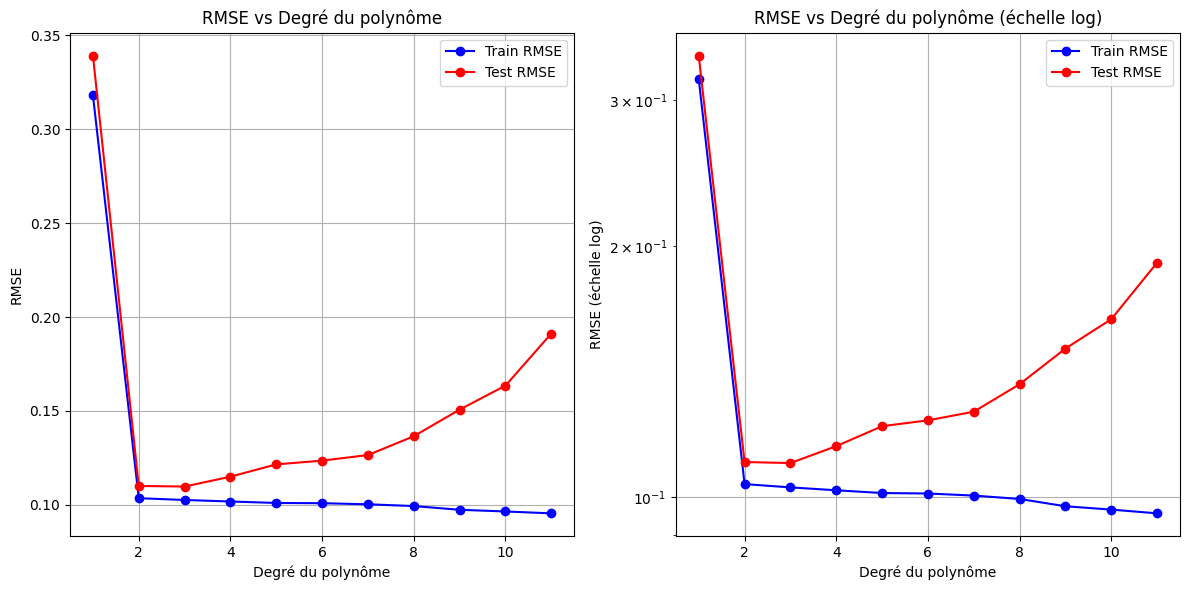


Meilleur degré polynomial: 3
RMSE minimum sur le test: 0.110


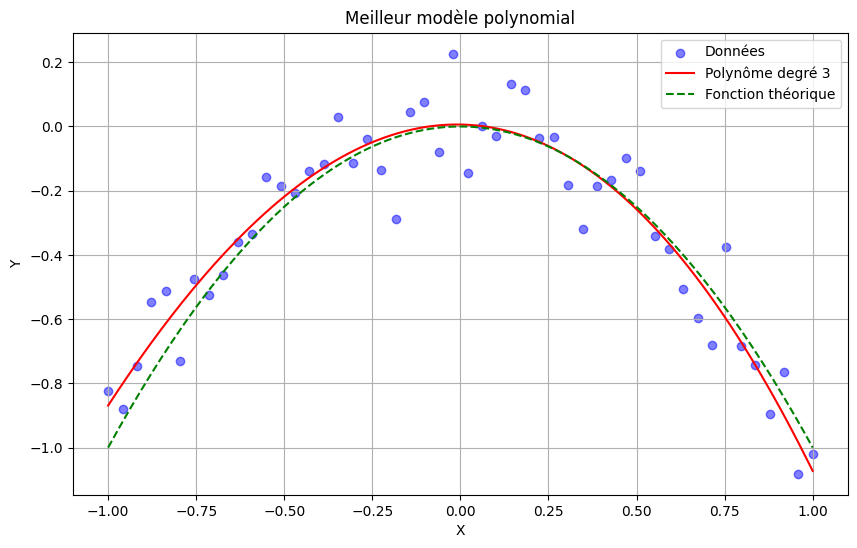

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import math

# Génération du dataset
np.random.seed(0)
x = np.linspace(-1, 1, 50)  # 50 points entre -1 et 1
y = -x**2 + np.random.normal(0, 0.1, len(x))  # Fonction quadratique avec bruit

X = x.reshape(-1, 1)

def calculate_cv_rmse(X, y, degree, n_splits=5):
    """
    Calcule le RMSE moyen avec validation croisée
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    
    train_rmses = []
    test_rmses = []
    
    for train_idx, test_idx in kf.split(X_poly):
        X_train, X_test = X_poly[train_idx], X_poly[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        train_rmse = math.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse = math.sqrt(mean_squared_error(y_test, y_test_pred))
        
        train_rmses.append(train_rmse)
        test_rmses.append(test_rmse)
    
    return np.mean(train_rmses), np.mean(test_rmses)

# Calcul des RMSE pour différents degrés
degrees = range(1, 12)
results = []

for degree in degrees:
    train_rmse, test_rmse = calculate_cv_rmse(X, y, degree)
    results.append((degree, train_rmse, test_rmse))
    print(f"Degré {degree}: Train RMSE = {train_rmse:.3f}, Test RMSE = {test_rmse:.3f}")

# Préparation des données pour le plotting
degrees = [r[0] for r in results]
train_rmses = [r[1] for r in results]
test_rmses = [r[2] for r in results]

# Visualisation des résultats
plt.figure(figsize=(12, 6))

# Graphique échelle normale
plt.subplot(1, 2, 1)
plt.plot(degrees, train_rmses, 'bo-', label='Train RMSE')
plt.plot(degrees, test_rmses, 'ro-', label='Test RMSE')
plt.xlabel('Degré du polynôme')
plt.ylabel('RMSE')
plt.title('RMSE vs Degré du polynôme')
plt.legend()
plt.grid(True)

# Graphique échelle logarithmique
plt.subplot(1, 2, 2)
plt.semilogy(degrees, train_rmses, 'bo-', label='Train RMSE')
plt.semilogy(degrees, test_rmses, 'ro-', label='Test RMSE')
plt.xlabel('Degré du polynôme')
plt.ylabel('RMSE (échelle log)')
plt.title('RMSE vs Degré du polynôme (échelle log)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Identification du meilleur degré
best_degree = degrees[np.argmin(test_rmses)]
print(f"\nMeilleur degré polynomial: {best_degree}")
print(f"RMSE minimum sur le test: {min(test_rmses):.3f}")

# Visualisation du meilleur modèle
poly = PolynomialFeatures(degree=best_degree)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

X_smooth = np.linspace(-1, 1, 200).reshape(-1, 1)
X_smooth_poly = poly.transform(X_smooth)
y_smooth = model.predict(X_smooth_poly)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Données')
plt.plot(X_smooth, y_smooth, 'r-', label=f'Polynôme degré {best_degree}')
plt.plot(X_smooth, -X_smooth**2, 'g--', label='Fonction théorique')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Meilleur modèle polynomial')
plt.legend()
plt.grid(True)
plt.show()
